In [1]:
# Math and visualization libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
df = pd.read_csv('data/raw/Flight_Booking.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Price Variation

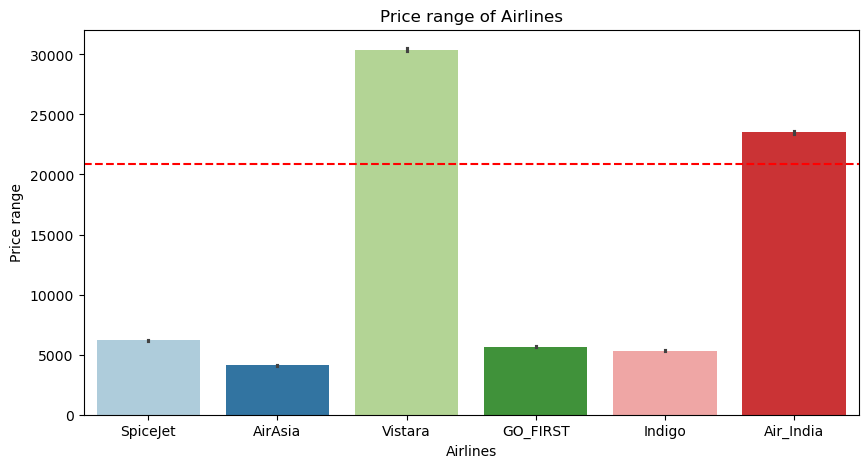

In [8]:
# Price range - Airlines
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='airline', y='price', hue='airline', palette='Paired')
plt.axhline(y=df['price'].mean(), color='red', linestyle='--', label='Average Price')


plt.title('Price range of Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price range')

plt.show()

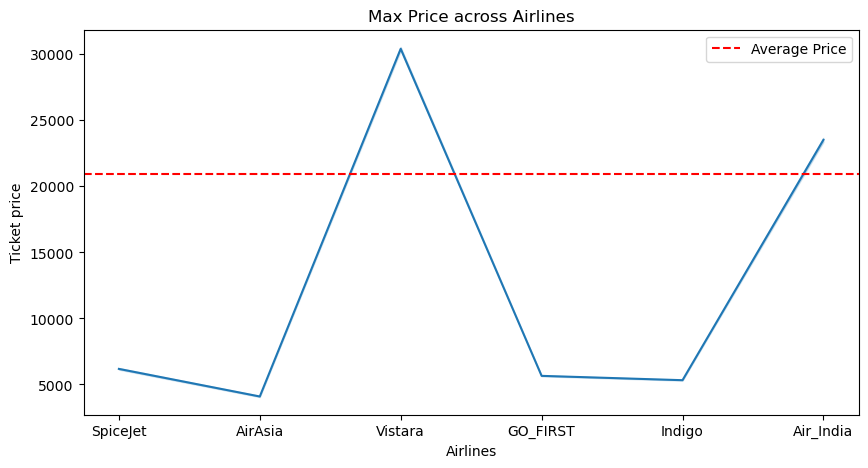

In [9]:
# Max Price - Airlines
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='airline', y='price')
plt.axhline(y=df['price'].mean(), color='red', linestyle='--', label='Average Price')

plt.title('Max Price across Airlines')
plt.xlabel('Airlines')
plt.ylabel('Ticket price')

plt.legend()
plt.show()

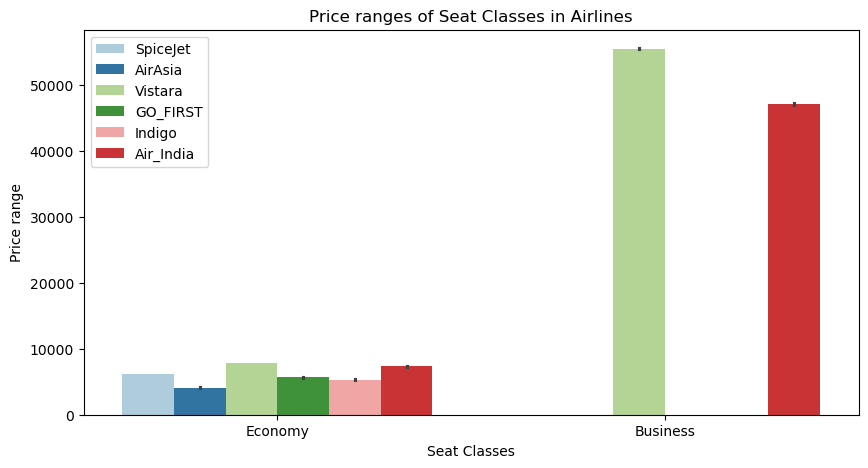

In [10]:
# Price ranges - Seat Classes per Airline
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='class', y='price', hue='airline', palette='Paired')

plt.title('Price ranges of Seat Classes in Airlines')
plt.xlabel('Seat Classes')
plt.ylabel('Price range')

plt.legend()
plt.show()

### Fares Approaching Departure

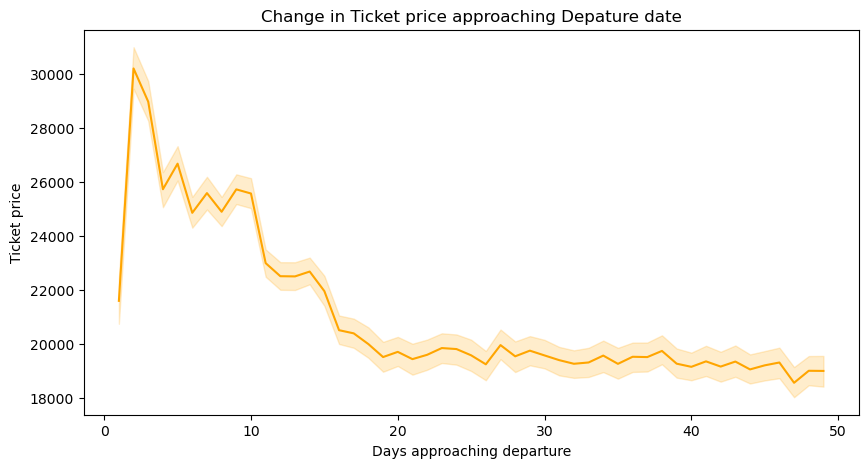

In [11]:
# Fare - Approaching depature date
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='days_left', y='price', color='orange')

plt.title('Change in Ticket price approaching Depature date')
plt.xlabel('Days approaching departure')
plt.ylabel('Ticket price')

plt.show()

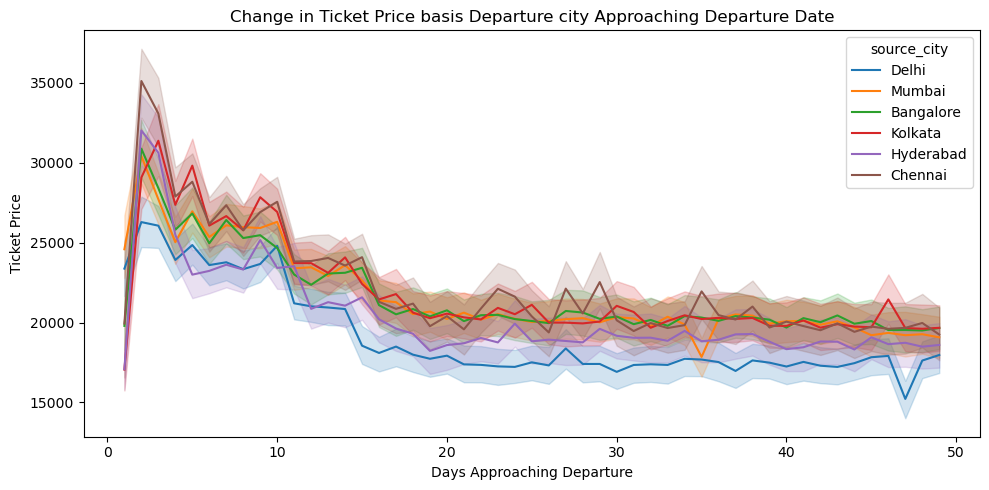

In [12]:
# Fare - Departure destinations
plt.figure(figsize=(10, 5))

    # Consistent color allocation for cities
palette = sns.color_palette("tab10", n_colors=df['destination_city'].nunique())

    # Plot for Departure city
sns.lineplot(data=df, x='days_left', y='price', hue='source_city', palette=palette)
plt.title('Change in Ticket Price basis Departure city Approaching Departure Date')
plt.xlabel('Days Approaching Departure')
plt.ylabel('Ticket Price')

plt.tight_layout()
plt.show()

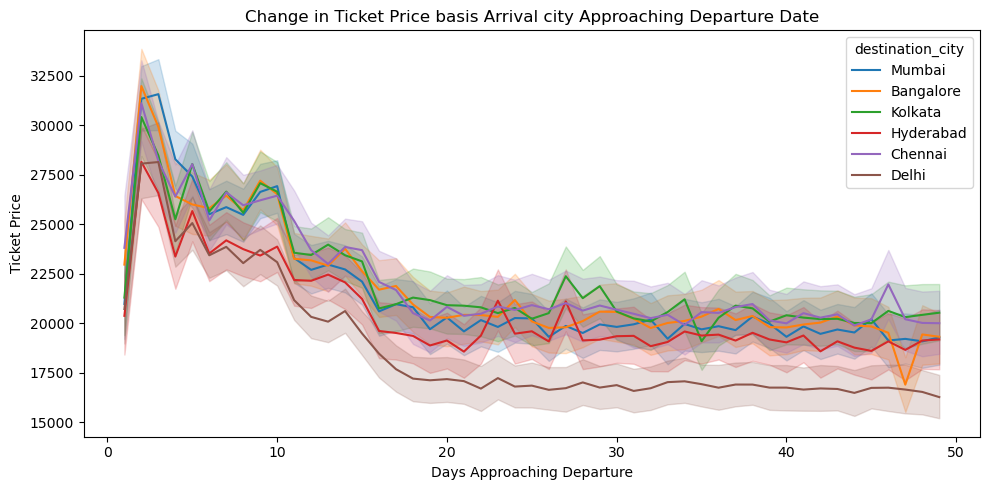

In [13]:
# Fare - Arrival destinations
plt.figure(figsize=(10, 5))

    # Consistent color allocation for cities
palette = sns.color_palette("tab10", n_colors=df['destination_city'].nunique())

    # Plot for Arrival city
sns.lineplot(data=df, x='days_left', y='price', hue='destination_city', palette=palette)
plt.title('Change in Ticket Price basis Arrival city Approaching Departure Date')
plt.xlabel('Days Approaching Departure')
plt.ylabel('Ticket Price')

plt.tight_layout()
plt.show()

# Frequency of Flights

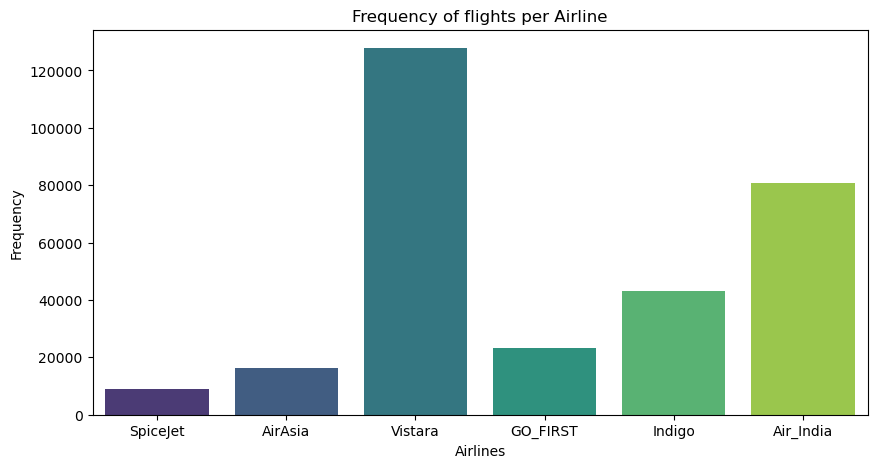

In [14]:
# Frequency - Airline
plt.figure(figsize=(10,5))
sns.countplot(x=df['airline'], hue=df['airline'], palette='viridis')

plt.title('Frequency of flights per Airline')
plt.xlabel('Airlines')
plt.ylabel('Frequency')

plt.show()

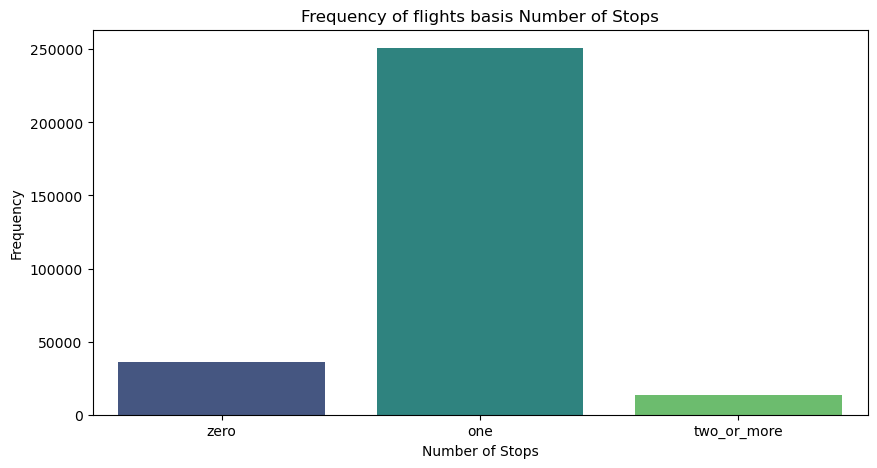

In [15]:
# Frequency - Number of Stops
plt.figure(figsize=(10,5))
sns.countplot(x=df['stops'], hue=df['stops'], palette='viridis')

plt.title('Frequency of flights basis Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Frequency')

plt.show()

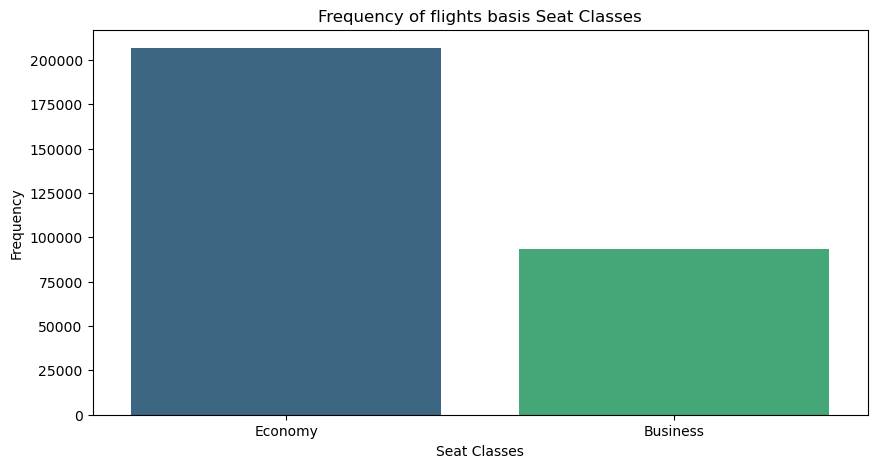

In [16]:
# Frequency - Seat Classes
plt.figure(figsize=(10,5))
sns.countplot(x=df['class'], hue=df['class'], palette='viridis')

plt.title('Frequency of flights basis Seat Classes')
plt.xlabel('Seat Classes')
plt.ylabel('Frequency')

plt.show()

### City: Departure - Arrival

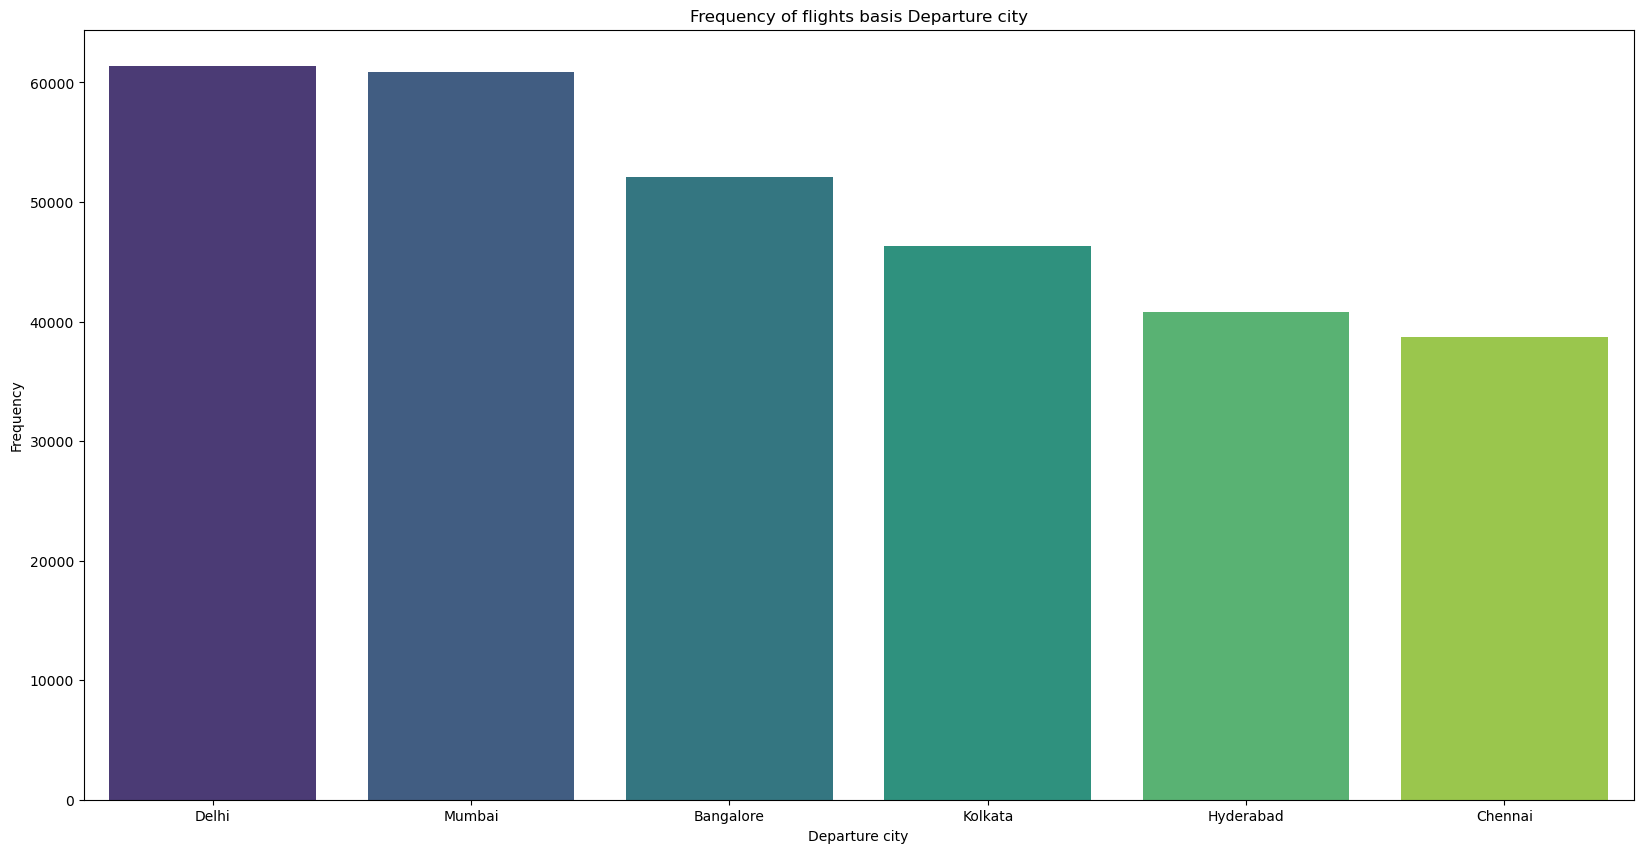

In [17]:
# Frequency - Departure city
plt.figure(figsize=(20,10))
sns.countplot(x=df['source_city'], hue=df['source_city'], palette='viridis')

plt.title('Frequency of flights basis Departure city')
plt.xlabel('Departure city')
plt.ylabel('Frequency')

plt.show()

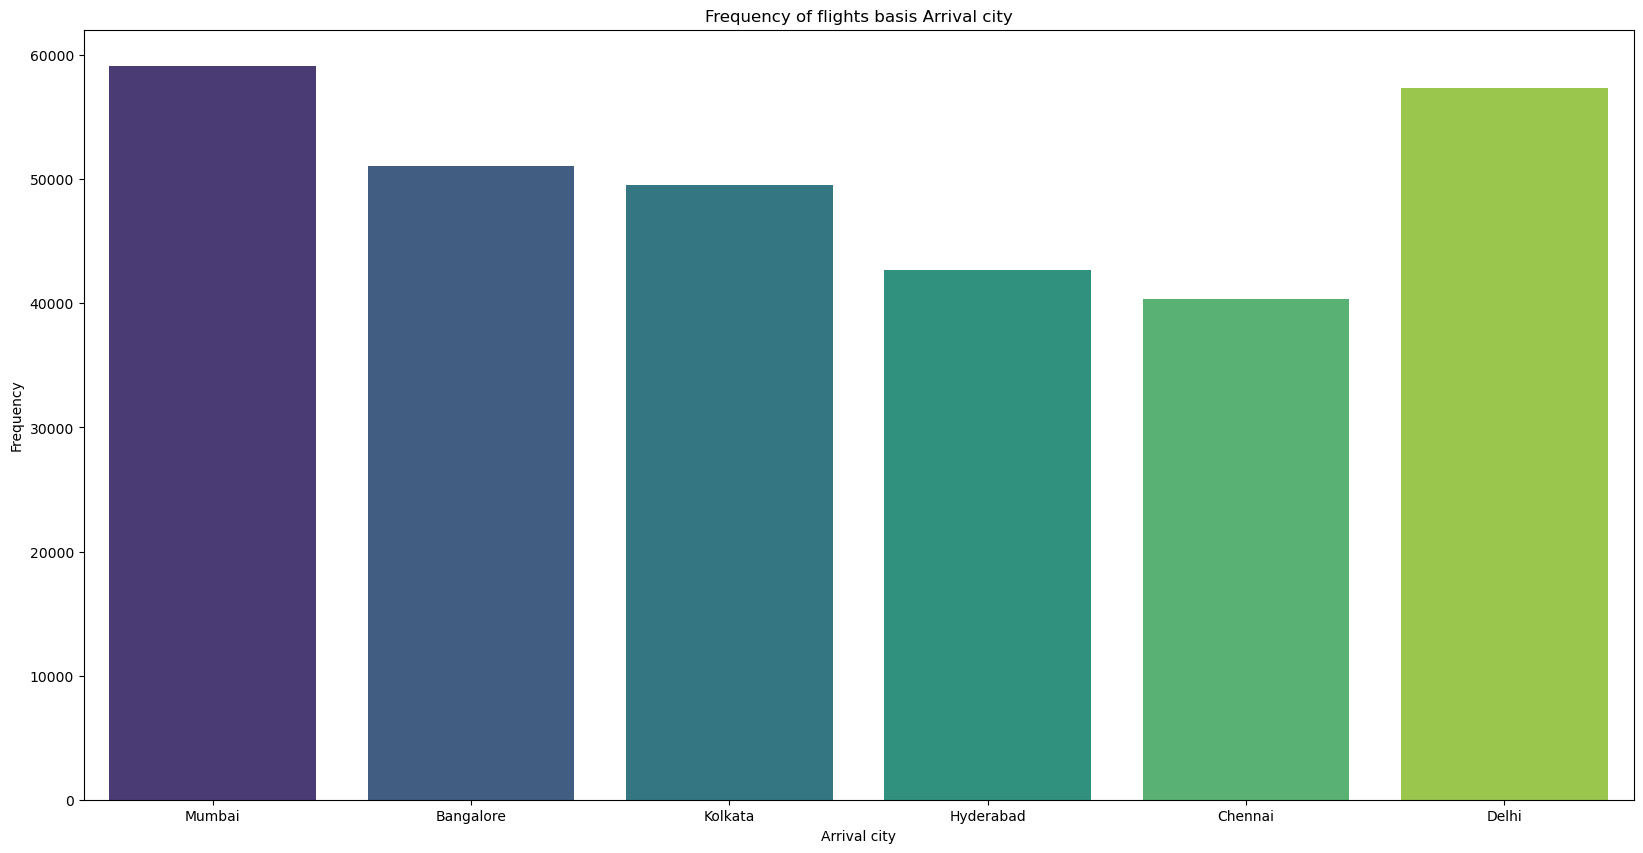

In [18]:
# Frequency - Arrival city
plt.figure(figsize=(20,10))
sns.countplot(x=df['destination_city'], hue=df['destination_city'], palette='viridis')

plt.title('Frequency of flights basis Arrival city')
plt.xlabel('Arrival city')
plt.ylabel('Frequency')

plt.show()

### Time of Day

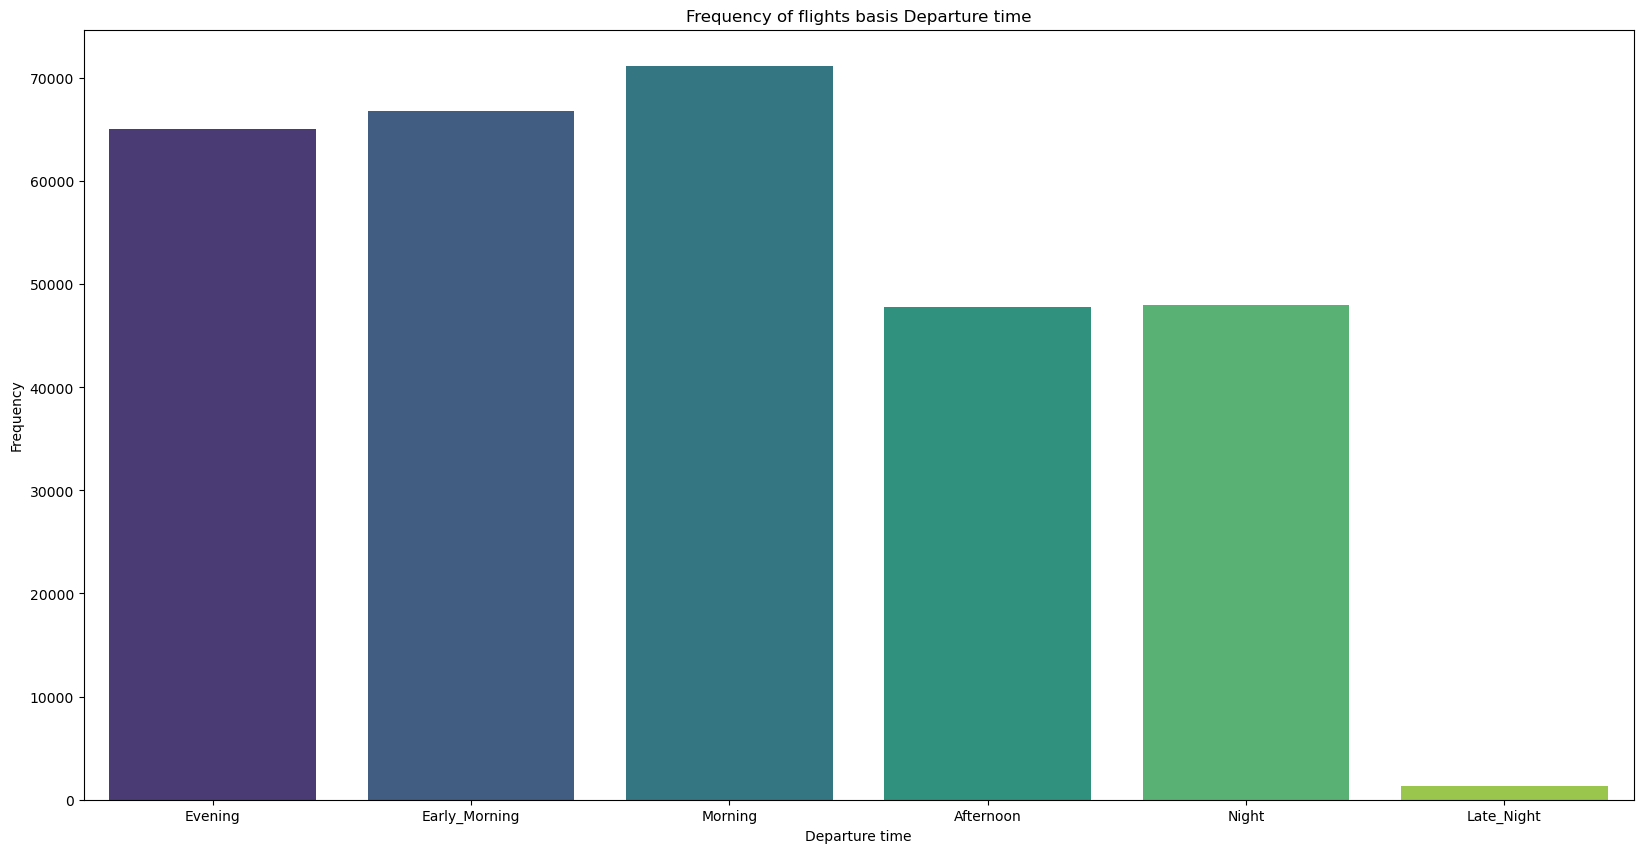

In [19]:
# Frequency - Departure time
plt.figure(figsize=(20,10))
sns.countplot(x=df['departure_time'], hue=df['departure_time'], palette='viridis')

plt.title('Frequency of flights basis Departure time')
plt.xlabel('Departure time')
plt.ylabel('Frequency')

plt.show()

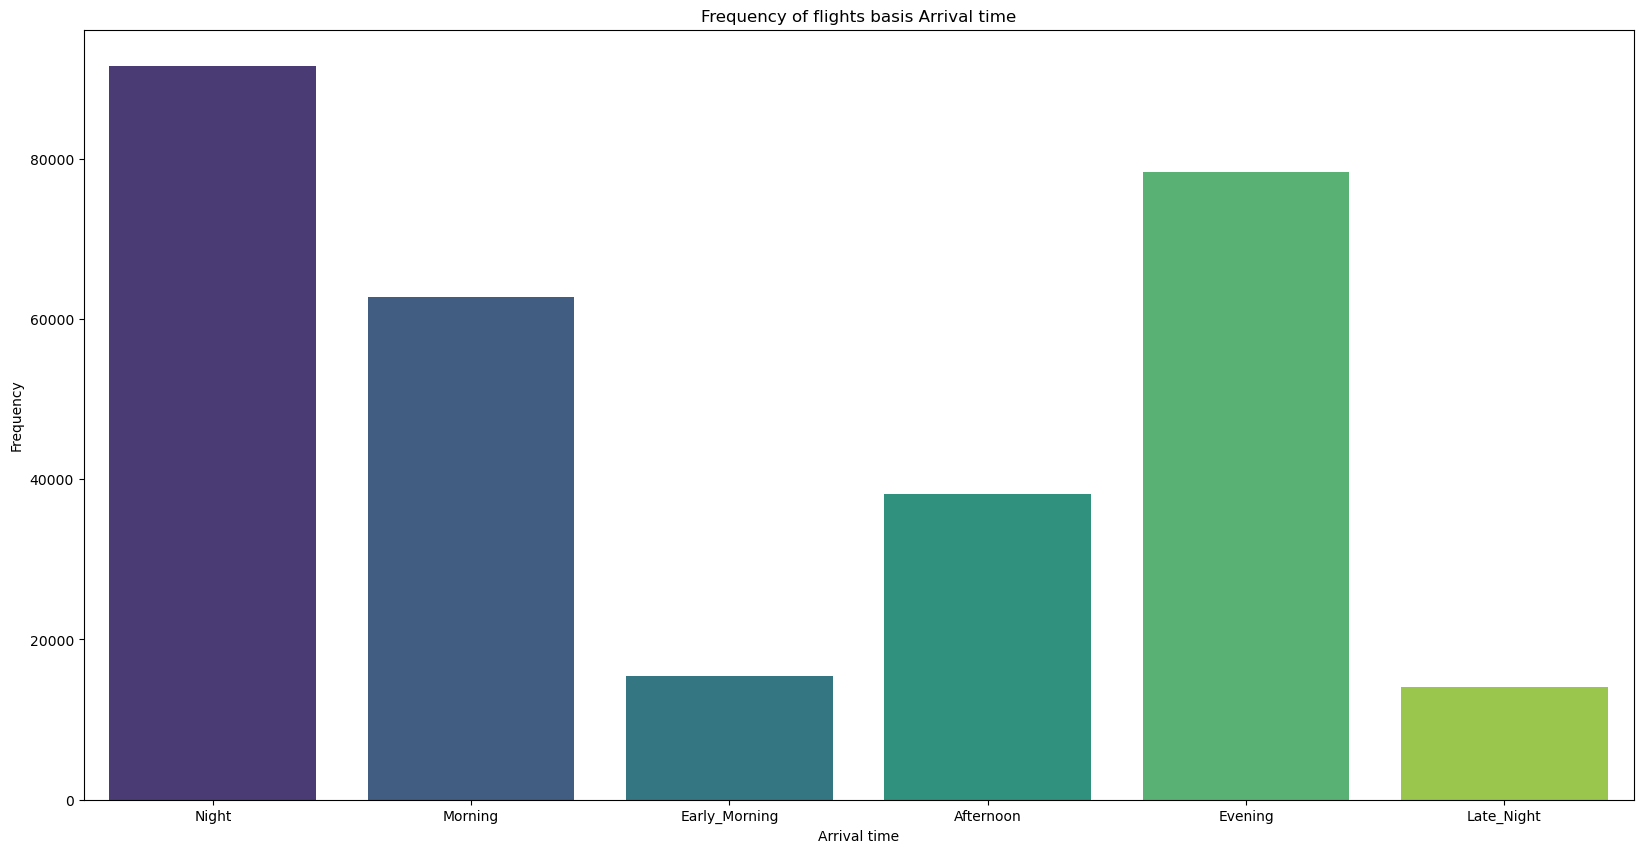

In [20]:
# Frequency - Arrival time
plt.figure(figsize=(20,10))
sns.countplot(x=df['arrival_time'], hue=df['arrival_time'], palette='viridis')

plt.title('Frequency of flights basis Arrival time')
plt.xlabel('Arrival time')
plt.ylabel('Frequency')

plt.show()